In [1]:
json_path = "./data/raw/tiger-coco.json"
img_dir = "./data/raw/"
img_dir_precise = "./data/raw/images"
crop_rois_dir = "./data/processed/cropped/"
processed_dir = "./data/processed/"

In [2]:
from src.image_preprocessor import ImageProcessor

image_processor = ImageProcessor(img_dir_precise)
target_images = image_processor.select_random_images()
image_processor.normalize(target_images, out_dir=processed_dir)

[ WARN:0@7.282] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


[{'img_name': 'TCGA-A7-A4SE-01Z-00-DX1.16BC8401-E40E-4A1A-9BD9-12735C9AE3F6_[25889, 6170, 26037, 6310].png',
  'norm_image': array([[[110,  70, 119],
          [110,  70, 119],
          [100,  61, 110],
          ...,
          [186, 130, 168],
          [189, 133, 170],
          [202, 151, 183]],
  
         [[111,  73, 122],
          [ 97,  60, 110],
          [ 89,  52, 100],
          ...,
          [166, 107, 150],
          [187, 133, 170],
          [204, 153, 184]],
  
         [[ 91,  59, 109],
          [ 78,  46,  95],
          [ 89,  55, 104],
          ...,
          [168, 108, 151],
          [186, 130, 168],
          [194, 142, 176]],
  
         ...,
  
         [[ 85,  54, 104],
          [ 77,  45,  93],
          [ 92,  59, 109],
          ...,
          [168, 132, 171],
          [156, 121, 162],
          [157, 122, 163]],
  
         [[ 90,  58, 107],
          [ 91,  59, 108],
          [108,  75, 125],
          ...,
          [182, 148, 182],
          [15

Count: 1879

Average Width: 215.6471527408196
Average Height: 221.10431080361894
Average image area: 119401.22990952634


{'count': 1879,
 'avg_w': np.float64(215.6471527408196),
 'avg_h': np.float64(221.10431080361894),
 'avg_area': np.float64(119401.22990952634)}

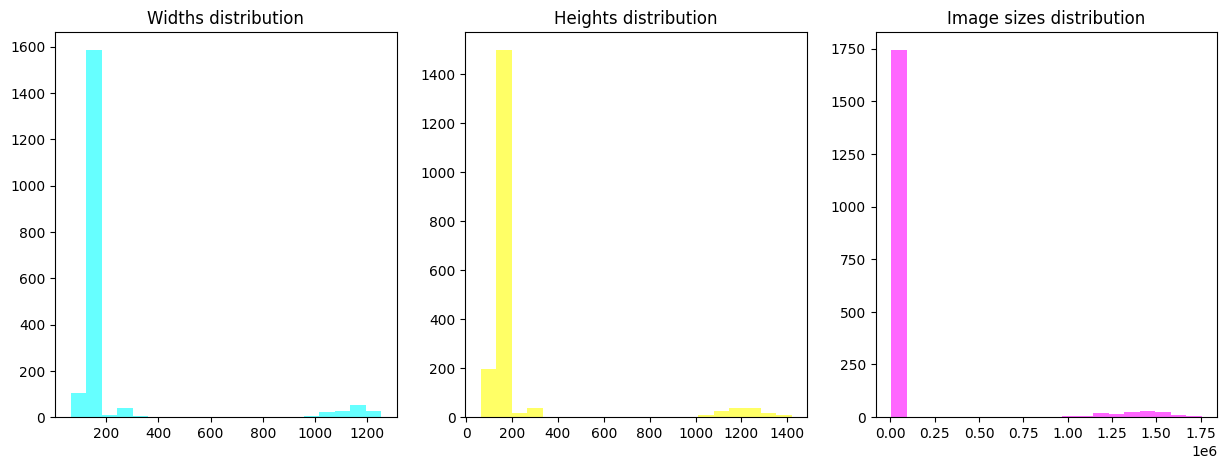

In [2]:
from src.image_stats import ImageStats

img_stats = ImageStats(img_dir_precise)
img_stats.get_image_stats(visual=True)

In [3]:
std = img_stats.contrast_std()
michelson = img_stats.michelson_contrast()

Contrast standard deviations: 42.90711719044899
Michelson contrast: 0.8151558266290178


In [ ]:
from src.crop_rois import image_rois_from_coco_json

image_rois_from_coco_json(json_path=json_path, image_dir=img_dir, output_dir=crop_rois_dir)

In [1]:
image_path = "./data/processed/cropped/TC_S01_P000130_C0001_B104_[123656, 58459, 124736, 59579]_-_335_415_16_16.png"

[ WARN:0@0.493] global loadsave.cpp:268 findDecoder imread_(''): can't open/read file: check file path/integrity


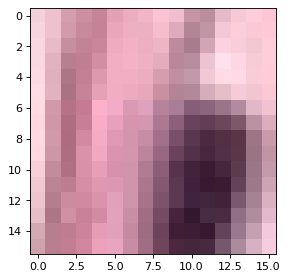

In [2]:
from src.sample import Sample

sample = Sample(image_path)
sample.show()

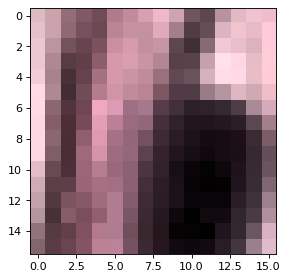

In [3]:
sample.equalize_hist(inplace=True)
sample.show()

In [4]:
sample.otsu_thresholding(inplace=True)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   

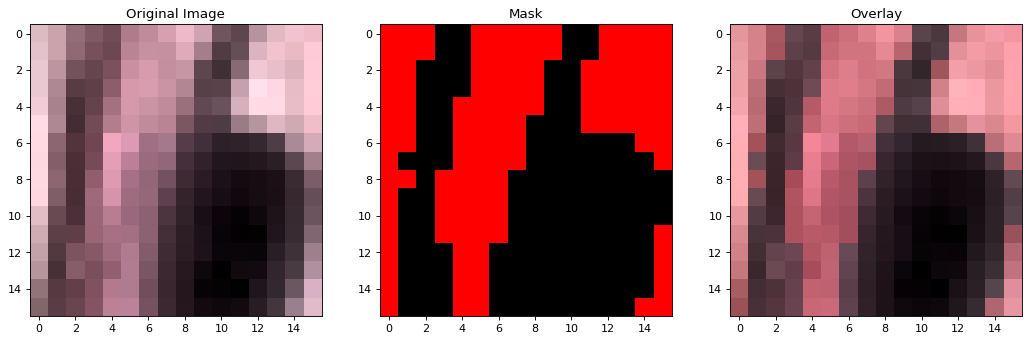

In [5]:
sample.show(with_mask=True)

/Users/martinsivak/Library/CloudStorage/OneDrive-SlovenskátechnickáuniverzitavBratislave/FIIT-STU/bc_thesis/bc_project/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc
